In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.4.1'

# Pytorch 基础
`Pytorch` 的基础组件包括:
1. 张量(`Tensor`): `Pytorch` 核心数据结构, 支持多维数组, 可以在 `CPU/GPU` 上进行加速计算
2. 自动求导(`Autograd`): 用于计算模型梯度
3. 神经网络(`nn.Module`): 用于构建神经网络模型
4. 优化器(`Optimizers`): 可以使用优化器(比如 `Adam, SGD`) 等来更新模型参数, 使得损失最小化
5. 设备(`Device`): 可以把模型和张量移动到 `GPU` 上加速计算

## Pytorch 基本架构
`Pytorch` 基本架构如下:
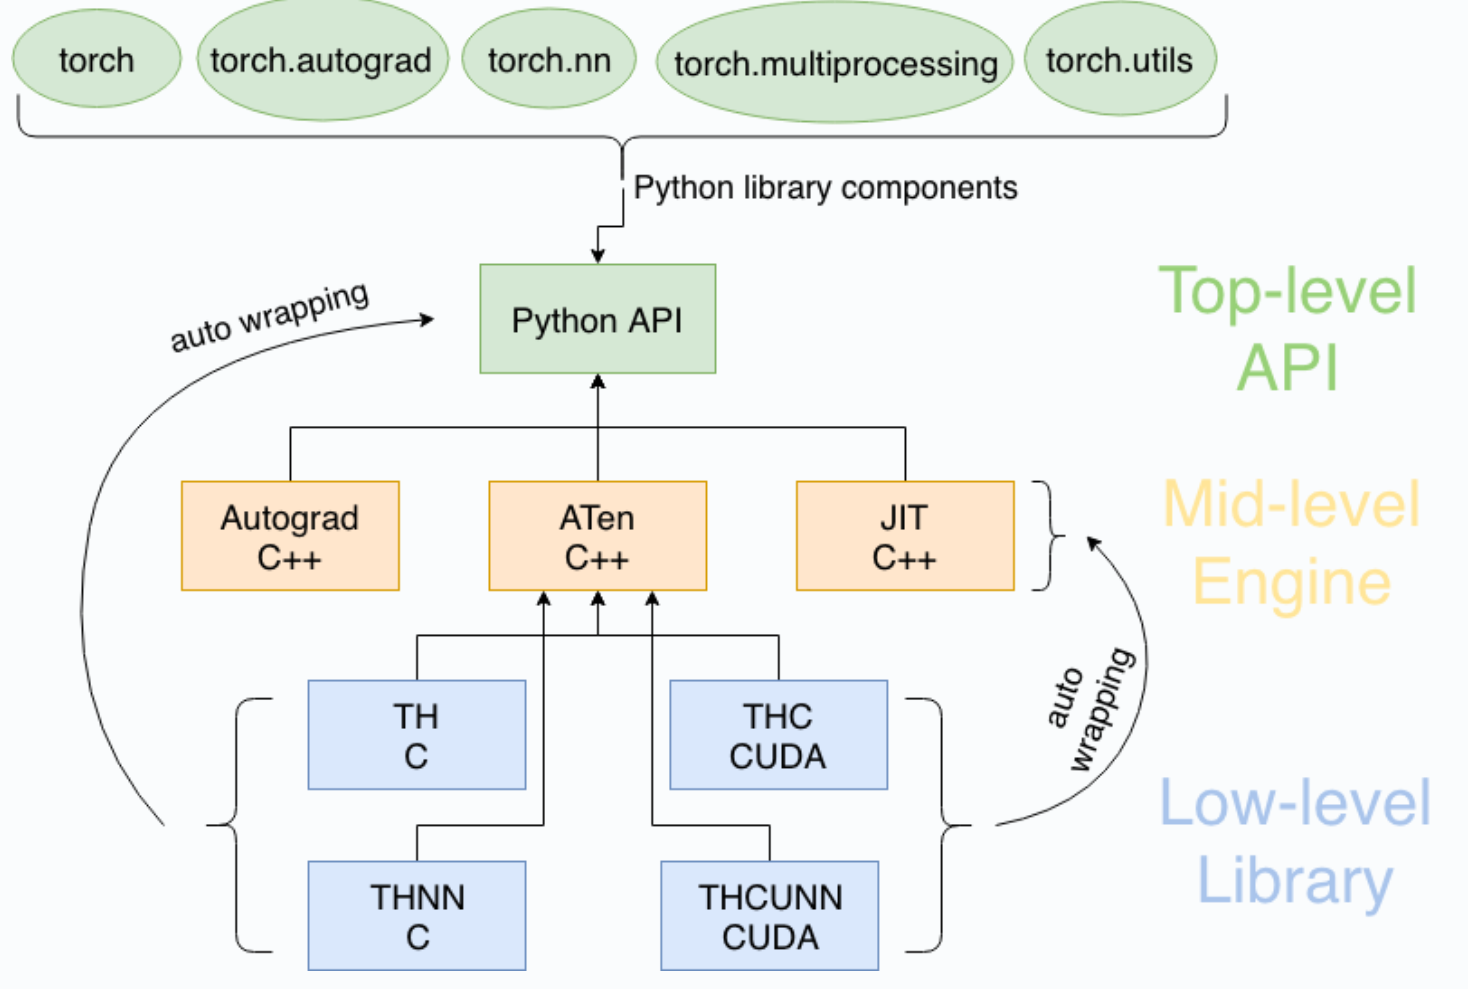

## 张量
张量的几个性质:
1. 维度: 比如一个标量(`0` 维张量), 一个向量(一维向量), 一个矩阵(二维向量)
2. 形状: 张量的形状表示在每一个维度的大小, 比如`(3, 4)` 表示 `3x4` 矩阵
3. 数据类型, 支持各种数据类型, 比如 `torch.int8, torch.int32`, `torch.float32, torch.float64` 以及 `torch.bool` 等

In [6]:
# 1. 创建张量
# 1.1 创建张量
v1 = torch.zeros(2, 3)
v2 = torch.ones(2, 3)
v3 = torch.randn(2, 3)
print(v1)
print('============')
print(v2)
print('============')
print(v3)
print('============')
# 1.2 利用 numpy 数组创建张量
na1 = np.array([[1, 2], [3, 4]])
nv1 = torch.from_numpy(na1)
print(nv1)
print('============')
# 1.3 在指定设备(CPU/GPU) 上创建张量
# 首先确定设备为 gpu or cpu, 决定使用 cuda 计算还是使用 cpu 计算
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dv1 = torch.randn(2, 3, device=device)
print(dv1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[-0.4461, -1.1490,  0.9205],
        [-0.8674,  0.1169, -0.7145]])
tensor([[1, 2],
        [3, 4]])
tensor([[ 1.5768,  1.1142, -0.9731],
        [ 0.6117, -0.0365,  0.0557]])


In [9]:
# 2. 张量的常见操作
e = torch.randn(2, 3)
f = torch.randn(2, 3)
# 2.1 算术操作
print(e)
print(f)
print(e + f)
# 2.2 张量的转置
g = torch.randn(3, 2)
print(g)
print(g.t())
# 2.3 张量的形状
print(g.shape)

tensor([[-0.1413, -2.3568, -0.9245],
        [ 0.2040,  0.4186,  0.1150]])
tensor([[ 1.4711, -1.4728,  2.6700],
        [ 1.3063, -0.1890,  0.3256]])
tensor([[ 1.3299, -3.8297,  1.7455],
        [ 1.5102,  0.2296,  0.4406]])
tensor([[ 0.2966, -1.0399],
        [-0.3226,  1.3749],
        [-1.0943, -2.1885]])
tensor([[ 0.2966, -0.3226, -1.0943],
        [-1.0399,  1.3749, -2.1885]])
torch.Size([3, 2])


In [12]:
# 3. 张量与设备, 可以进行张量的移动
# 含义是把 tensor_from_list 移动到 gpu 上成为 tensor_gpu 上
if torch.cuda.is_available():
    tensor_gpu = tensor_from_list.to('cuda')

## 梯度和自动微分

In [18]:
# 1. 创建一个带梯度的张量
tensor_requires_grad = torch.tensor([1.0], requires_grad=True)
# 进行一些操作
tensor_result = tensor_requires_grad**3 + tensor_requires_grad**2
# 计算梯度
tensor_result.backward()   # y.backward()
print(tensor_requires_grad.grad)  # 反向传播之后, x.grad = dy/dx

tensor([5.])


## 自动求导(Autograd)
自动求导的应用: 
1. 在训练神经网络的时候进行梯度计算
2. 进行反向传播算法的实现
`PyTorch` 中自动求导功能使用 `autograde` 模块自动计算梯度, `torch.Tensor` 对象有一个 `requires_grad` 属性, 用于表示时候需要计算该张量的梯度

In [22]:
# 1. 创建一个需要计算梯度的张量
x = torch.randn(2, 2, requires_grad=True)
print(x)
# 执行一系列操作
y = x + 2
z = y * y * 3
out = z.mean()
print(out)

tensor([[ 0.8020, -1.3231],
        [ 0.2223, -0.6551]], requires_grad=True)
tensor(11.2923, grad_fn=<MeanBackward0>)


In [23]:
out.backward()
print(x.grad)  # 注意这里涉及到矩阵求导
# 自动梯度计算步骤:
# d(out)/dx = d(out)/dz * dz/dy * dy/dx

tensor([[4.2029, 1.0154],
        [3.3334, 2.0174]])


In [24]:
# 2. 停止梯度计算, 当不希望某些张量的梯度被计算的时候,可以使用
# torch.no_grad() 或者 requires_grad=False 禁止梯度计算
with torch.no_grad():
    y = x*2  # 此时 不会对于 x 进行梯度计算

## 神经网络(nn.Module)
训练神经网络模型大概可以分为如下几个步骤:
1. 数据准备:(收集和处理数据, 包括数据清洗、标准化和归一化 ; 将数据分为训练集、测试集和验证集)
2. 定义模型: 选择模型架构(比如神经网络、决策树等 ; 初始化模型参数(比如选择合适的 $b_0, w_0$))
3. 选择合适的损失函数
4. 选择合适的优化器
5. 反向传播
6. 参数更新(利用计算的梯度和优化器策略更新模型参数)
7. 迭代优化(不断循环这一个过程)
8. 模型调优(在测试集上进行调参, 比如改变学习率、增加正则化等)
9. 部署模型(将模型部署到生产环境中, 用于实际的预测任务)

In [31]:
# 1. 定义模型(一个简单的神经网络模型, 实现构造函数和 forward 函数)
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2) # 输入层到隐藏层
        self.fc2 = nn.Linear(2, 1) # 隐藏层到输出层
    # 一次前馈的步骤, 也就是一次向前计算的步骤(对于一个样本计算预测值)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# 2. 创建模型实例对象
model = SimpleNN()

# 3. 定义损失函数和优化器
criterion = nn.MSELoss() # 使用平方损失函数
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adam 优化器, 
## 对于 model 的参数使用 使用优化器

# 4. 准备数据(其实应该在前面完成)
X = torch.randn(10, 2) # 10 个样本, 2 个特征 (10*2 样本)
Y = torch.randn(10, 1) # 10 个目标值

epochs = []
losses = []
# 5. 训练循环
for epoch in range(1000):
    optimizer.zero_grad() # 清空之前的梯度
    output = model(X) # 前向传播, 其实底层调用 forward 函数
    loss = criterion(output, Y) # 计算损失
    loss.backward()  # 反向传播
    optimizer.step() # 更新参数    

    if (epoch+1)%10 == 0:
        print(f'Epoch [{epoch + 1}/200], Loss: {loss.item():.4f}')
        epochs.append(epoch)
        losses.append(loss.item())

Epoch [10/200], Loss: 0.9952
Epoch [20/200], Loss: 0.9703
Epoch [30/200], Loss: 0.9486
Epoch [40/200], Loss: 0.9301
Epoch [50/200], Loss: 0.9142
Epoch [60/200], Loss: 0.9007
Epoch [70/200], Loss: 0.8892
Epoch [80/200], Loss: 0.8794
Epoch [90/200], Loss: 0.8709
Epoch [100/200], Loss: 0.8632
Epoch [110/200], Loss: 0.8565
Epoch [120/200], Loss: 0.8505
Epoch [130/200], Loss: 0.8453
Epoch [140/200], Loss: 0.8405
Epoch [150/200], Loss: 0.8350
Epoch [160/200], Loss: 0.8296
Epoch [170/200], Loss: 0.8247
Epoch [180/200], Loss: 0.8207
Epoch [190/200], Loss: 0.8169
Epoch [200/200], Loss: 0.8132
Epoch [210/200], Loss: 0.8095
Epoch [220/200], Loss: 0.8059
Epoch [230/200], Loss: 0.8026
Epoch [240/200], Loss: 0.7993
Epoch [250/200], Loss: 0.7959
Epoch [260/200], Loss: 0.7925
Epoch [270/200], Loss: 0.7891
Epoch [280/200], Loss: 0.7855
Epoch [290/200], Loss: 0.7819
Epoch [300/200], Loss: 0.7781
Epoch [310/200], Loss: 0.7742
Epoch [320/200], Loss: 0.7701
Epoch [330/200], Loss: 0.7659
Epoch [340/200], Lo

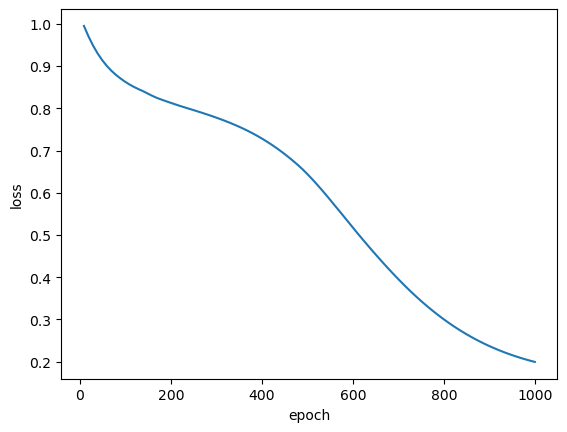

In [34]:
plt.plot(epochs, losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 设备 (Device)
`Pytorch` 允许把模型和数据移动到 `GPU` 上进行加速运算, 可以使用 `torch.device` 指定计算设备

In [35]:
# 1. 把模型和数据移动到 GPU 上
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# 1.1 移动模型到 指定的设备
model.to(device)
# 1.2 移动数据到 指定的设备
X = X.to(device)
Y = Y.to(device)

cpu
